A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term

the most common performance measure of a regression model is the Root Mean Square Error (RMSE), Therefore, to train a linear regression model, we need to find the value of 0 (THE MODELS PARAMETER VECTOR) that minimizes the RMSE

There is a closed-form solution ( a mathematical equation that gives the result directlY) to find the value of 0 that minimizes the cost function called the Normal Equation

In [2]:
# Generate linear-looking data to test
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [8]:
# next use inv() function 
# the np.linalg to compute the inverse of a matrix
# and dot() method for matrix multiplication

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
theta_best

array([[4.21848021],
       [2.80681265]])

In [10]:
# now we can make prediction using ^0, the value of 0 that minimizes the cost function
X_new = np.array([[0], [2]])

In [11]:
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance


In [12]:
y_predict = X_new_b.dot(theta_best)


In [13]:
y_predict

array([[4.21848021],
       [9.83210551]])

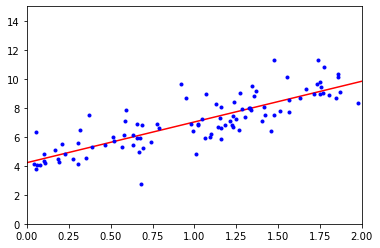

In [14]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [15]:
# Performing linear ression using scikit learn 
from sklearn.linear_model import LinearRegression

In [16]:
lin_reg = LinearRegression()

In [18]:
lin_reg.fit(X, y)

LinearRegression()

In [20]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21848021]), array([[2.80681265]]))

In [21]:
lin_reg.predict(X_new)

array([[4.21848021],
       [9.83210551]])

The LinearRegression class is based on teh cipy.linmalg.lstsq() function which you can call directly

In [24]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)


In [25]:
theta_best_svd

array([[4.21848021],
       [2.80681265]])